In [7]:
from pprint import pprint

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#from graph_tool import draw

import pybrite as pb

In [2]:
batch_size = 20
nodes_size_interval = (10, 15)
m_size_interval = (2, 2)

batch_generator = pb.graph_batch_generator(batch_size, nodes_size_interval, m_size_interval)

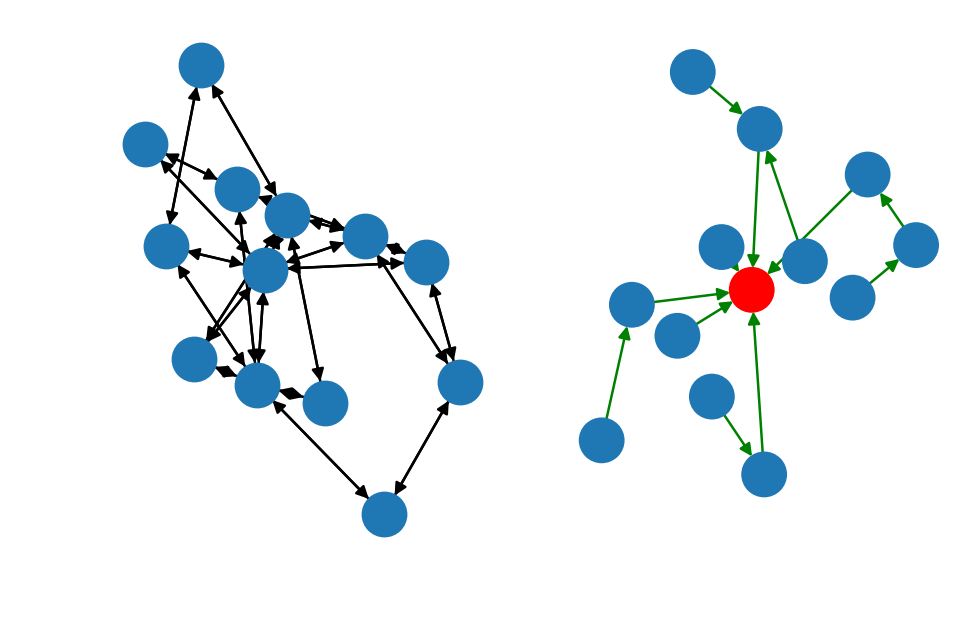

Features from Input
For Nodes:
{0: array([1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.]),
 1: array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.]),
 2: array([1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.]),
 3: array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.]),
 4: array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.]),
 5: array([0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.]),
 6: array([0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
  

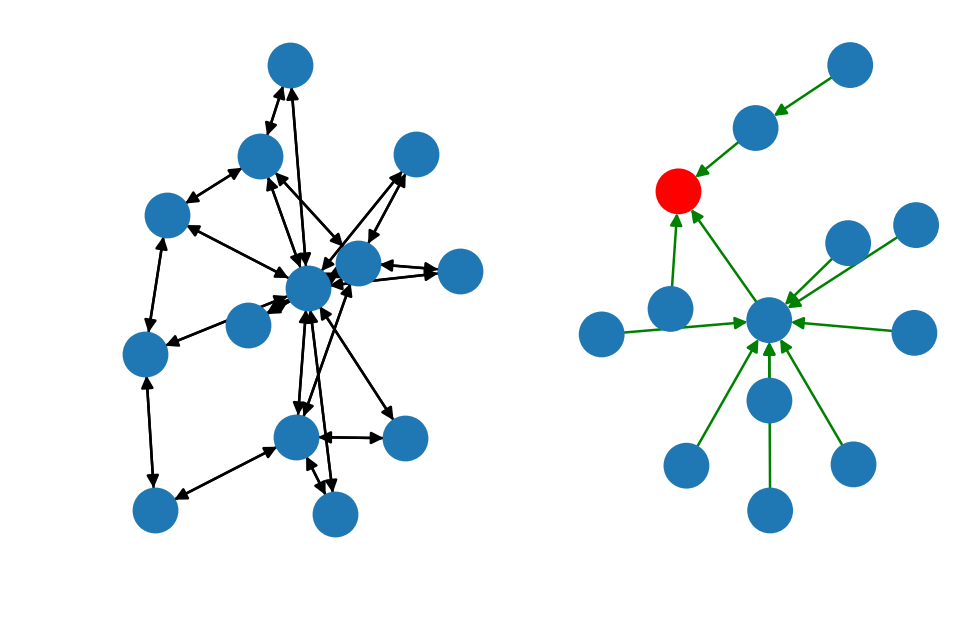

Features from Input
For Nodes:
{0: array([0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.]),
 1: array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.]),
 2: array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.]),
 4: array([0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.]),
 5: array([1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.]),
 6: array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
  

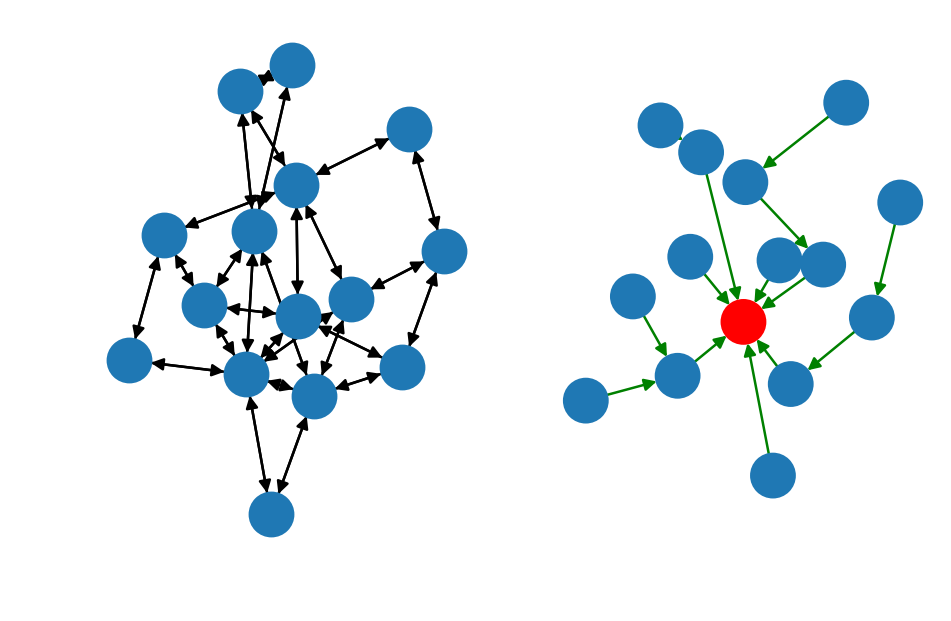

Features from Input
For Nodes:
{0: array([0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.]),
 1: array([0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.]),
 2: array([0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]),
 3: array([1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.]),
 4: array([1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.]),
 5: array([1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.]),
 6: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
  

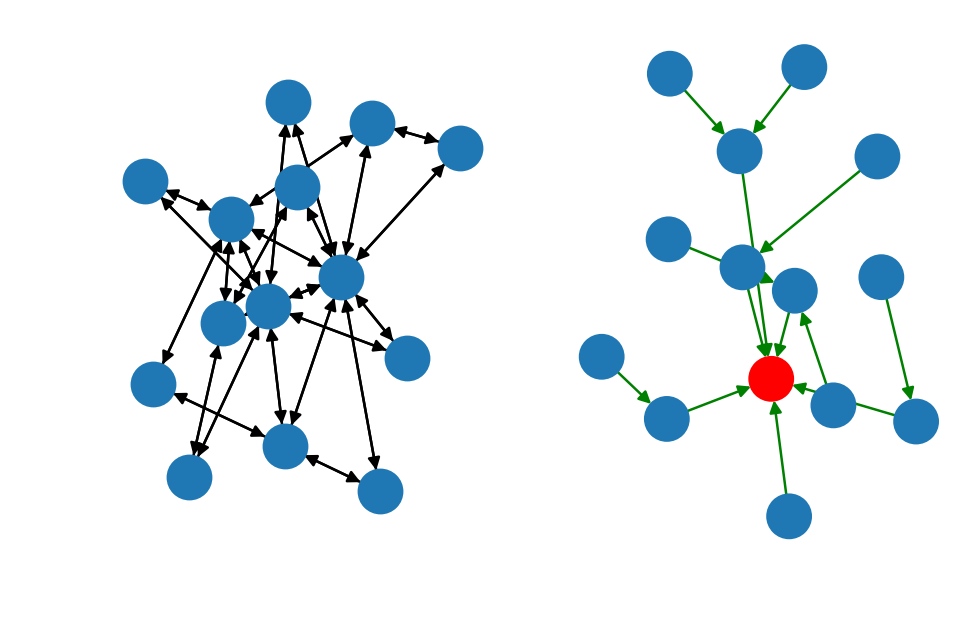

Features from Input
For Nodes:
{0: array([1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.]),
 1: array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.]),
 2: array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.]),
 3: array([1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.]),
 4: array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.]),
 5: array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.]),
 6: array([0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
  

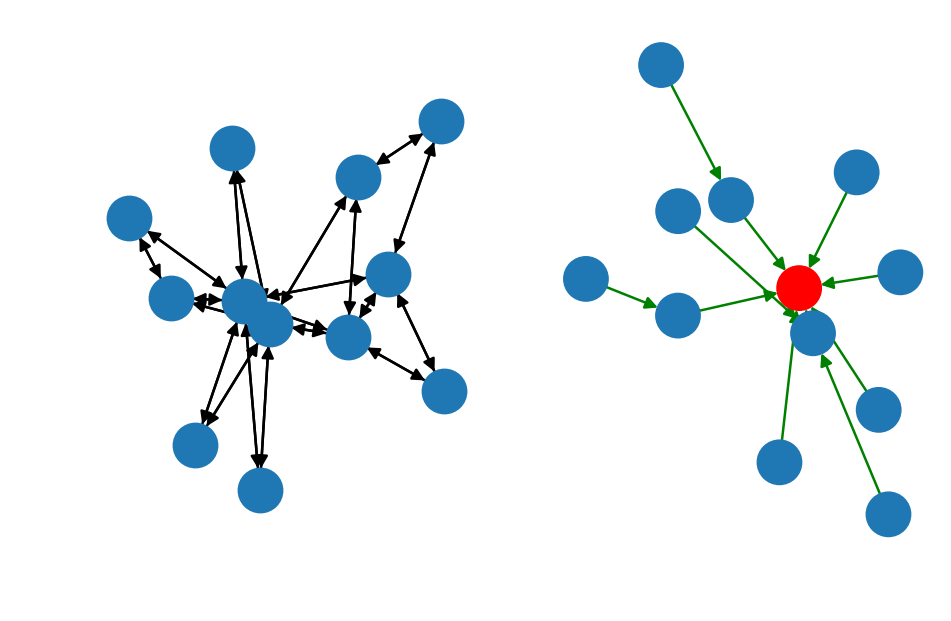

Features from Input
For Nodes:
{0: array([0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.]),
 1: array([1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.]),
 2: array([1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.]),
 4: array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.]),
 5: array([1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.]),
 6: array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
  

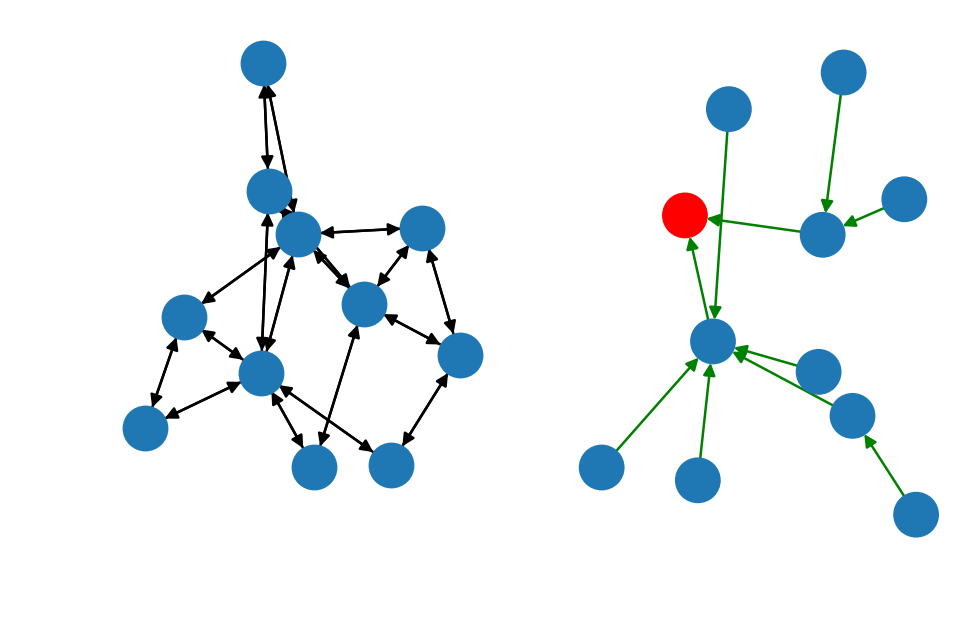

Features from Input
For Nodes:
{0: array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.]),
 1: array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.]),
 2: array([1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.]),
 3: array([0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.]),
 4: array([1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.]),
 5: array([1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 6: array([1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
  

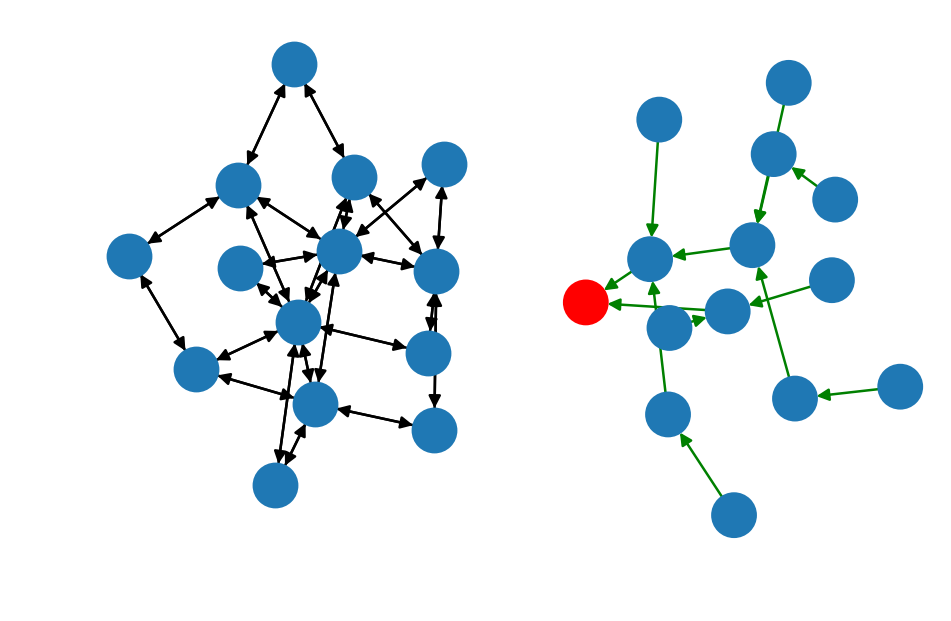

Features from Input
For Nodes:
{0: array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.]),
 1: array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.]),
 2: array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.]),
 3: array([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 4: array([0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.]),
 5: array([0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.]),
 6: array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
  

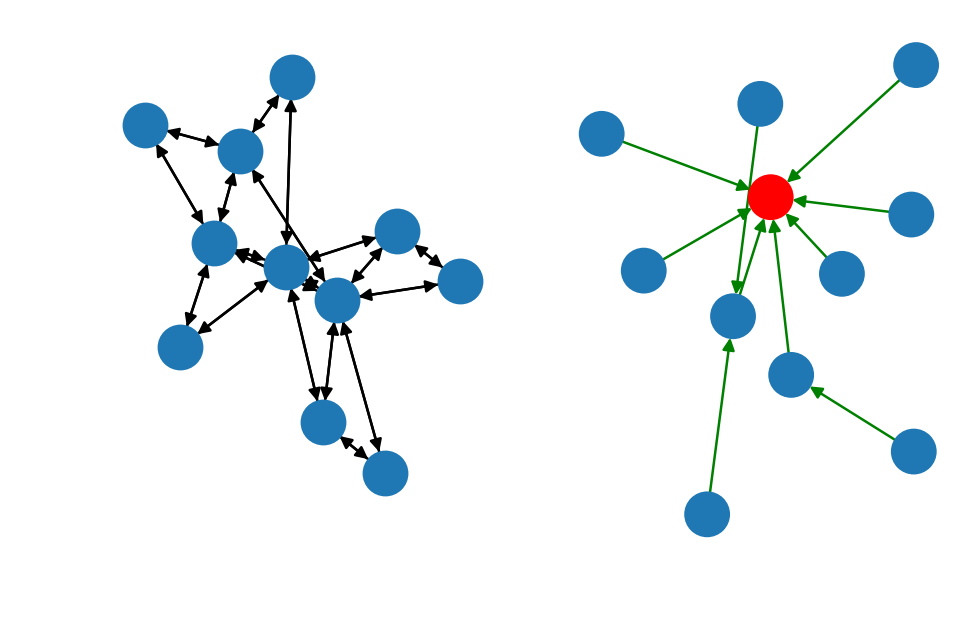

Features from Input
For Nodes:
{0: array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]),
 1: array([1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.]),
 2: array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.]),
 3: array([1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.]),
 4: array([0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.]),
 5: array([0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.]),
 6: array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
  

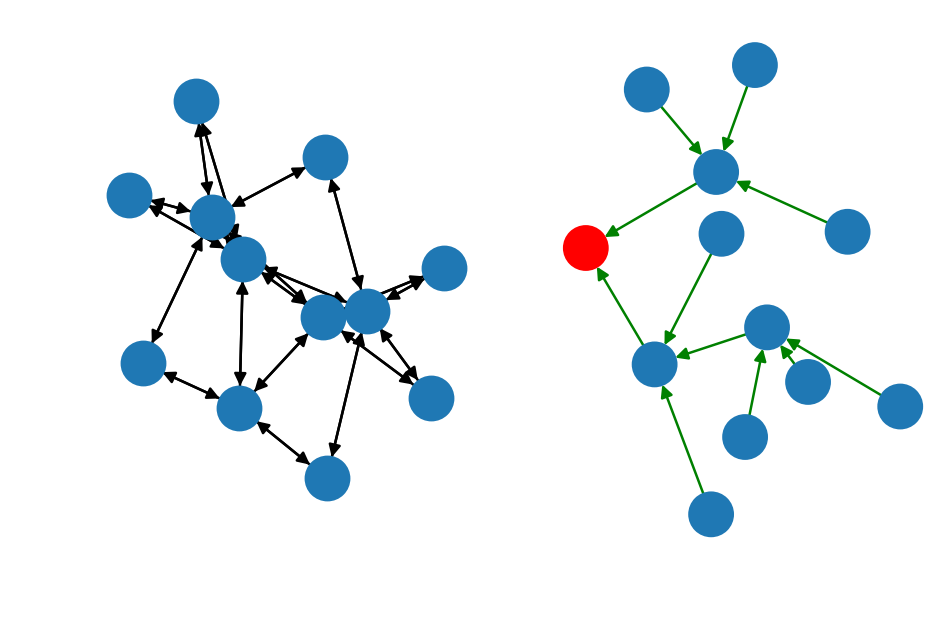

Features from Input
For Nodes:
{0: array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.]),
 1: array([0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.]),
 2: array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.]),
 3: array([0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.]),
 4: array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.]),
 5: array([1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.]),
 6: array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
  

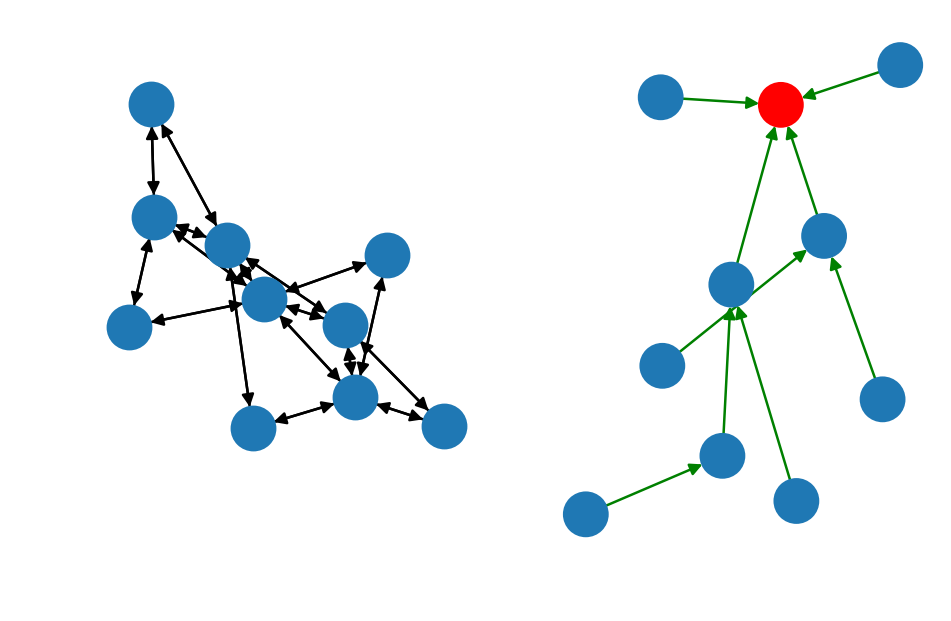

Features from Input
For Nodes:
{0: array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.]),
 1: array([0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.]),
 2: array([1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.]),
 3: array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.]),
 4: array([1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.]),
 5: array([1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.]),
 6: array([1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
  

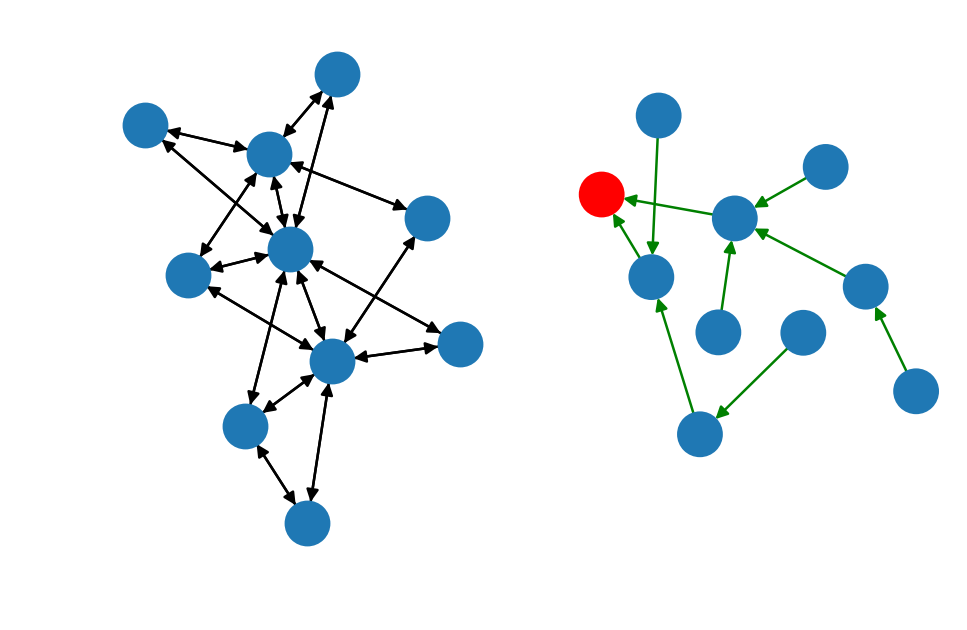

Features from Input
For Nodes:
{0: array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.]),
 1: array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.]),
 2: array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.]),
 3: array([0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.]),
 4: array([1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.]),
 5: array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.]),
 6: array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
  

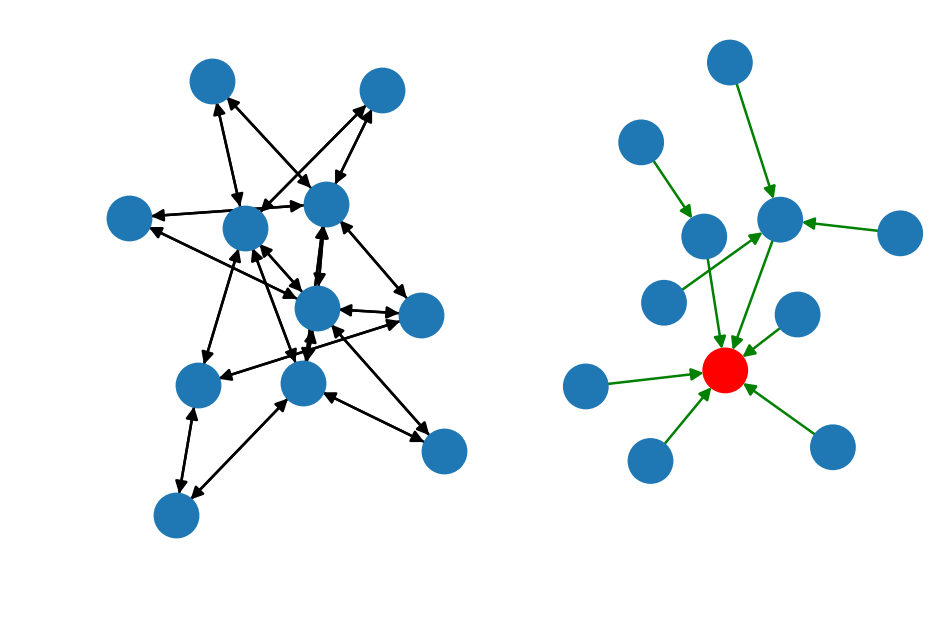

Features from Input
For Nodes:
{0: array([1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.]),
 1: array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.]),
 2: array([0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.]),
 3: array([1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.]),
 4: array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.]),
 5: array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.]),
 6: array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
  

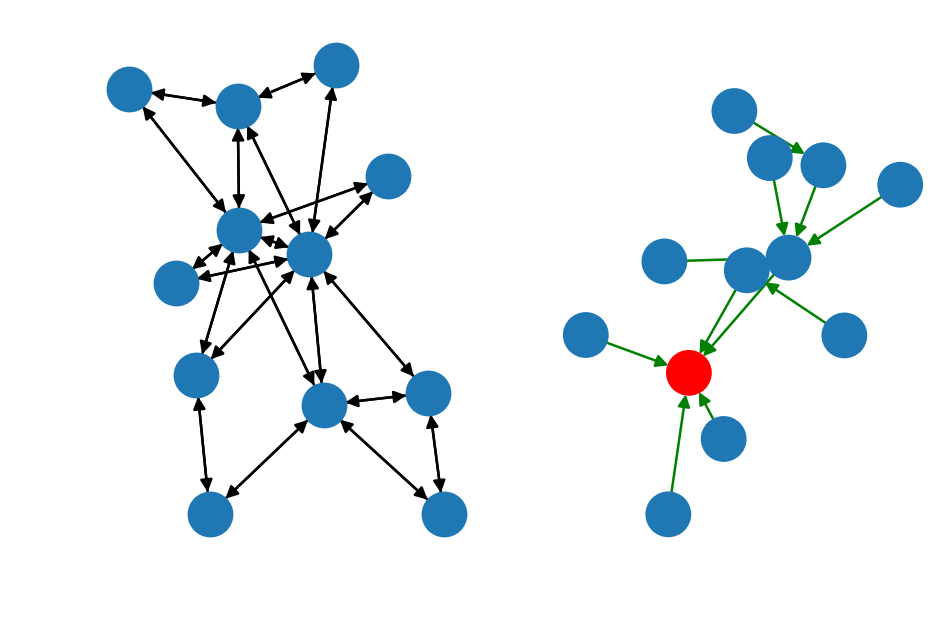

Features from Input
For Nodes:
{0: array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.]),
 1: array([0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.]),
 2: array([1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.]),
 3: array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.]),
 4: array([0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.]),
 5: array([0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.]),
 6: array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
  

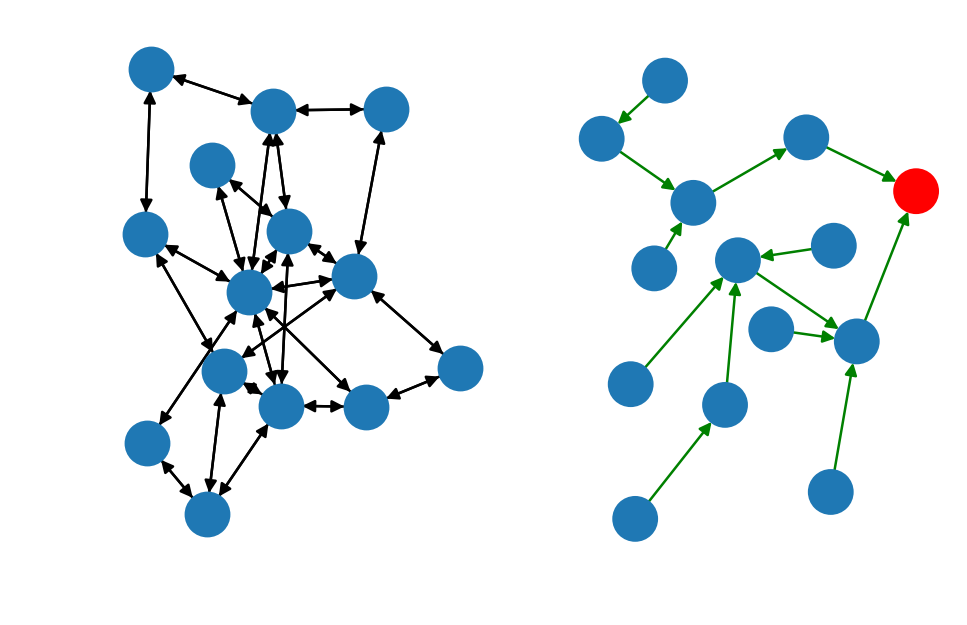

Features from Input
For Nodes:
{0: array([1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]),
 1: array([1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.]),
 2: array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.]),
 3: array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.]),
 4: array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.]),
 5: array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.]),
 6: array([1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
  

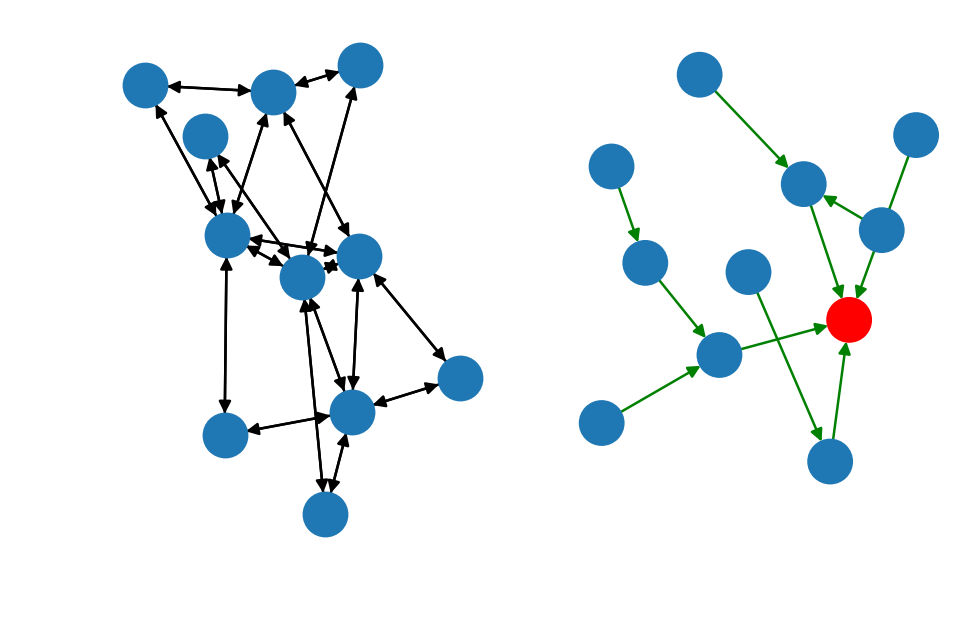

Features from Input
For Nodes:
{0: array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.]),
 1: array([1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.]),
 2: array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.]),
 3: array([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.]),
 4: array([1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.]),
 5: array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.]),
 6: array([0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
  

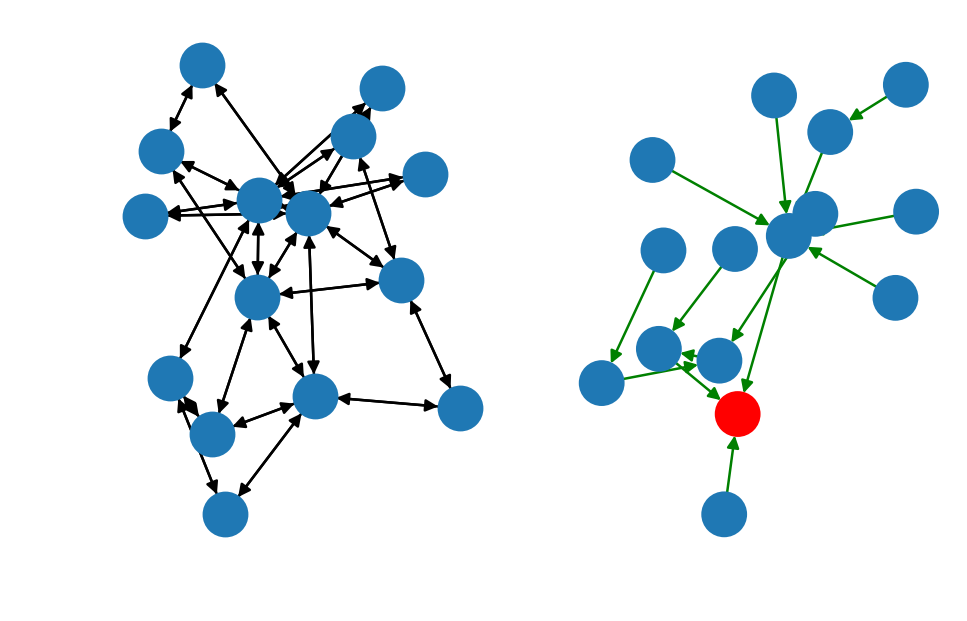

Features from Input
For Nodes:
{0: array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.]),
 1: array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.]),
 2: array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.]),
 3: array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.]),
 4: array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 5: array([0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.]),
 6: array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
  

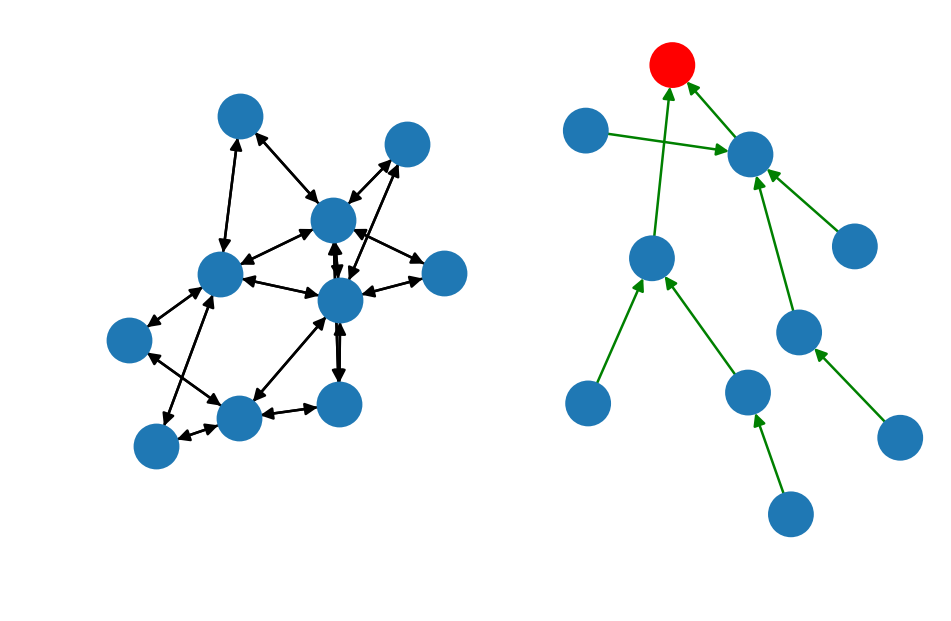

Features from Input
For Nodes:
{0: array([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.]),
 1: array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.]),
 2: array([0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.]),
 3: array([0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.]),
 4: array([0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.]),
 5: array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.]),
 6: array([1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
  

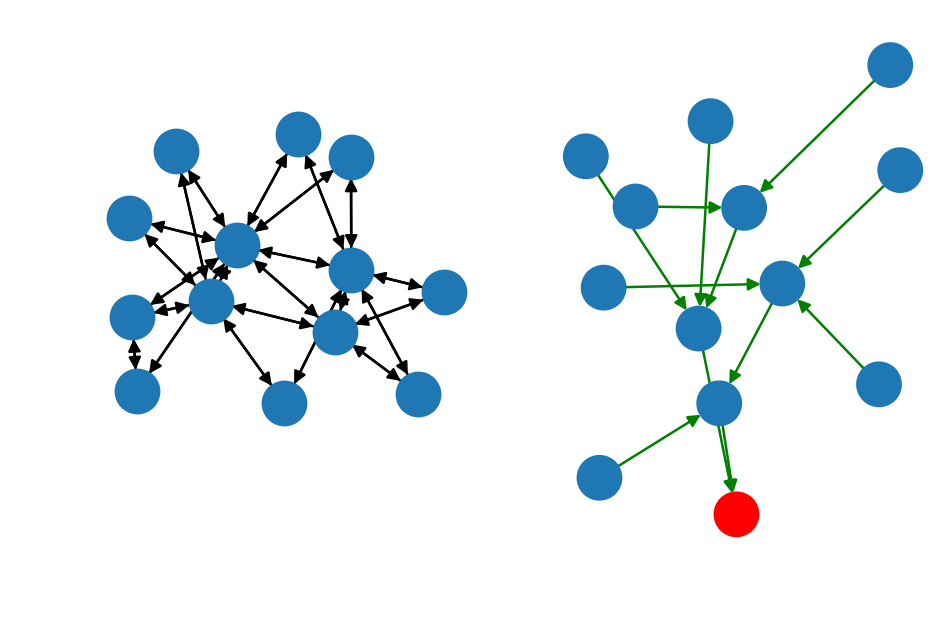

Features from Input
For Nodes:
{0: array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.]),
 1: array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.]),
 2: array([1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.]),
 3: array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.]),
 4: array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.]),
 5: array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.]),
 6: array([1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
  

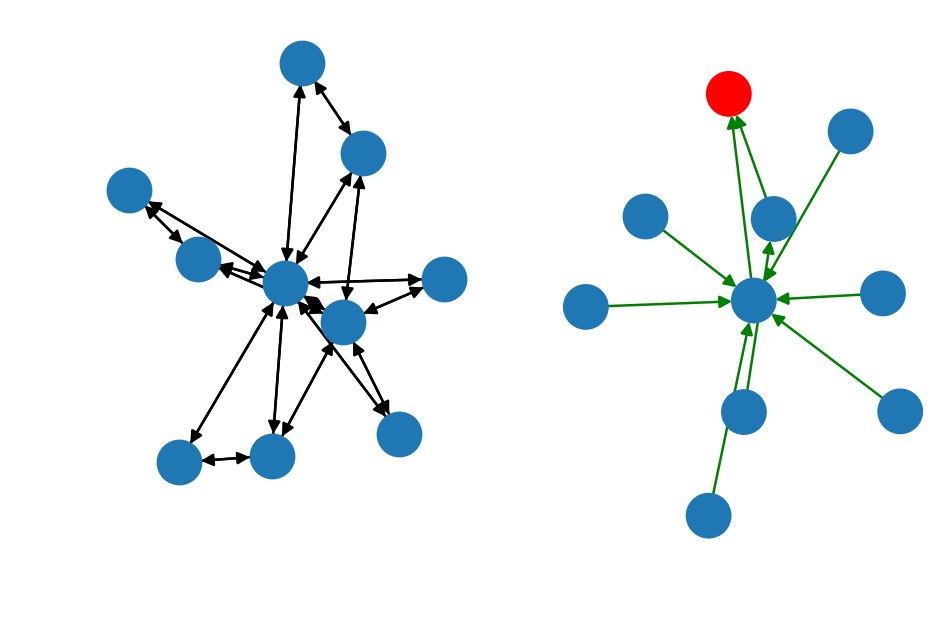

Features from Input
For Nodes:
{0: array([1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.]),
 1: array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.]),
 2: array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.]),
 3: array([1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.]),
 4: array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.]),
 5: array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.]),
 6: array([1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
  

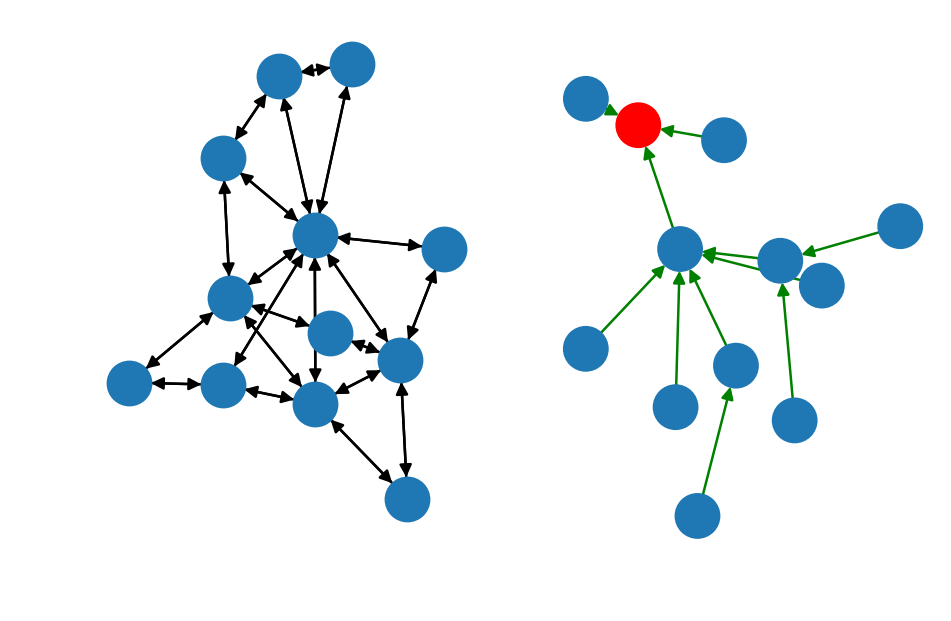

Features from Input
For Nodes:
{0: array([1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.]),
 1: array([1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.]),
 2: array([1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.]),
 3: array([0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.]),
 4: array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]),
 5: array([0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.]),
 6: array([0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
  

In [48]:
for in_batch, tg_batch in batch_generator:
    for in_graph, tg_graph in zip(in_batch, tg_batch):
        pos = list(dict(tg_graph.nodes(data="pos")).values())
        target_node = tg_graph.graph['features']
        edge_solution = [f[2] for f in tg_graph.edges(data="solution")]
        
        edges_to_plot = []
        for e, s in zip(tg_graph.edges(), edge_solution):
            if s:
                edges_to_plot.append(e)
        
        nodes_color = []
        for ip in dict(tg_graph.nodes(data="ip")).values():
            if np.all(ip == target_node):
                nodes_color.append("red")
            else:
                nodes_color.append("#1f78b4")
        
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, dpi=180)
        nx.draw(
            in_graph,
            ax=ax1,
            #pos=pos
        )
        nx.draw(
            tg_graph,
            ax=ax2,
            #pos=pos,
            edgelist=edges_to_plot,
            node_color=nodes_color,
            edge_color=["green"] * len(edges_to_plot)
        )
        plt.show()
        plt.close()
        
        print("Features from Input")
        print("For Nodes:")
        pprint(dict(in_graph.nodes(data="features")))
        print("For Edges:")
        pprint([((f[0], f[1]), f[2]) for f in in_graph.edges(data="features")])
        
        print("\nFeatures from Target")
        print("For Nodes:")
        pprint(dict(tg_graph.nodes(data="features")))
        print("For Edges:")
        pprint([((f[0], f[1]), f[2]) for f in tg_graph.edges(data="features")])
    break